# Exercise 2.1 – Unsupervised Learning Algorithms

## 📙 Notebook 2: Hierarchical Clustering with PCA-Reduced Weather Data

**Objective:**  
Apply Principal Component Analysis (PCA) to reduce dimensionality of the weather dataset and assess how hierarchical clustering results differ from those based on the full dataset.

**Workflow Overview:**
1. Import libraries
2. Load and filter the dataset (same as Notebook 1)
3. Preprocess and scale the data
4. Apply PCA and analyze explained variance
5. Reduce data dimensionality and export reduced dataset
6. Perform hierarchical clustering on PCA-reduced data
7. Compare dendrograms and cluster structure
8. Record observations and final conclusions

---

**Datasets Used:**
- `Dataset-weather-prediction-dataset-processed.csv` (Main data)
- `Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv` (For comparison)


# 📑 Table of Contents

1. [Import Libraries](#1)
2. [Load and Filter Dataset](#2)
3. [Preprocess and Scale Data](#3)
4. [Apply PCA and Visualize Variance](#4)
5. [Reduce Dimensions and Export Data](#5)
6. [Hierarchical Clustering on PCA Data](#6)  
    6.1 [Single Linkage](#6.1)  
    6.2 [Complete Linkage](#6.2)  
    6.3 [Average Linkage](#6.3)  
    6.4 [Ward Linkage](#6.4)  
7. [Cluster Comparison and Observations](#7)
8. [Conclusion](#8)


# 1. Import Libraries

### The required libraries are imported for data handling, PCA, clustering, and visualization.


In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# System Utilities
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


# 2. Load and Filter Dataset

### The original dataset is loaded and filtered to include only data from the 1980s for consistency with Notebook 1.


In [2]:
# Load the original dataset
df_weather = pd.read_csv("Dataset-weather-prediction-dataset-processed.csv")

# Convert 'DATE' column to datetime format
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'], format='%Y%m%d', errors='coerce')

# Filter rows where the year is in the 1980s
df_80s = df_weather[df_weather['DATE'].dt.year.between(1980, 1989)]

# Reset index
df_80s.reset_index(drop=True, inplace=True)

# Preview filtered dataset
print(f"✅ Filtered dataset shape (1980s only): {df_80s.shape}")
df_80s.head()


✅ Filtered dataset shape (1980s only): (3653, 170)


,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1980-01-01,1,6,2.1,0.83,1.018,0.40,0.01,8,1.6,...,6,0.90,1.0130,0.17,0.05,0,0.0,4.4,2.1,6.0
1,1980-01-02,1,5,2.1,0.84,1.018,0.34,0.09,7,0.9,...,7,0.89,1.0195,0.12,1.48,0,0.0,6.4,1.0,11.5
2,1980-01-03,1,8,2.1,0.80,1.018,0.44,0.07,9,2.0,...,8,0.95,1.0058,0.13,0.60,0,0.0,9.2,6.2,12.2
3,1980-01-04,1,8,2.1,0.94,1.018,0.18,0.43,9,0.0,...,5,0.80,1.0034,0.30,0.50,0,1.5,7.7,5.8,9.2
4,1980-01-05,1,8,2.1,0.90,1.018,0.25,0.26,8,0.2,...,7,0.79,1.0134,0.22,0.03,0,0.1,7.6,6.1,9.5


# 3. Preprocess and Scale Data

### Non-numeric columns are removed, and the remaining features are standardized using StandardScaler before applying PCA.


In [4]:
# Make a copy for preprocessing
df_pre_pca = df_80s.copy()

# Drop non-numeric and ID-like columns
cols_to_drop = ['DATE', 'STATION', 'NAME']
df_pre_pca = df_pre_pca.drop(columns=cols_to_drop, errors='ignore')

# Drop any remaining missing values
df_pre_pca = df_pre_pca.dropna()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform
df_scaled_pca = pd.DataFrame(scaler.fit_transform(df_pre_pca), columns=df_pre_pca.columns)

# Preview scaled data
df_scaled_pca.head()


,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.601193,0.224637,-8.881784e-16,0.682171,-0.01996,-0.959635,-0.443780,2.545028,-0.648373,-1.444209,...,0.055524,0.776252,-0.113499,-1.086828,-0.512422,-0.029917,-0.890217,-1.641922,-1.357732,-1.908024
1,-1.601193,-0.175851,-8.881784e-16,0.780361,-0.01996,-1.027984,-0.273476,2.200184,-0.818385,-1.566772,...,0.606692,0.642797,0.439886,-1.144519,1.460707,-0.029917,-0.890217,-1.110077,-1.624565,-0.496722
2,-1.601193,1.025612,-8.881784e-16,0.387600,-0.01996,-0.914070,-0.316052,2.889872,-0.551223,-1.416973,...,1.157859,1.443527,-0.726480,-1.132981,0.246473,-0.029917,-0.890217,-0.365493,-0.363173,-0.317101
3,-1.601193,1.025612,-8.881784e-16,1.762263,-0.01996,-1.210248,0.450319,2.889872,-1.036971,-1.457827,...,-0.495643,-0.558297,-0.930806,-0.936831,0.108492,-0.029917,-0.473701,-0.764377,-0.460203,-1.086903
4,-1.601193,1.025612,-8.881784e-16,1.369503,-0.01996,-1.130508,0.088422,2.545028,-0.988396,-0.926723,...,0.606692,-0.691752,-0.079445,-1.029137,-0.540018,-0.029917,-0.862449,-0.790969,-0.387430,-1.009922


# 4. Apply PCA and Visualize Variance

### PCA is applied to the scaled dataset, and the explained variance ratio is visualized to help determine the optimal number of dimensions.


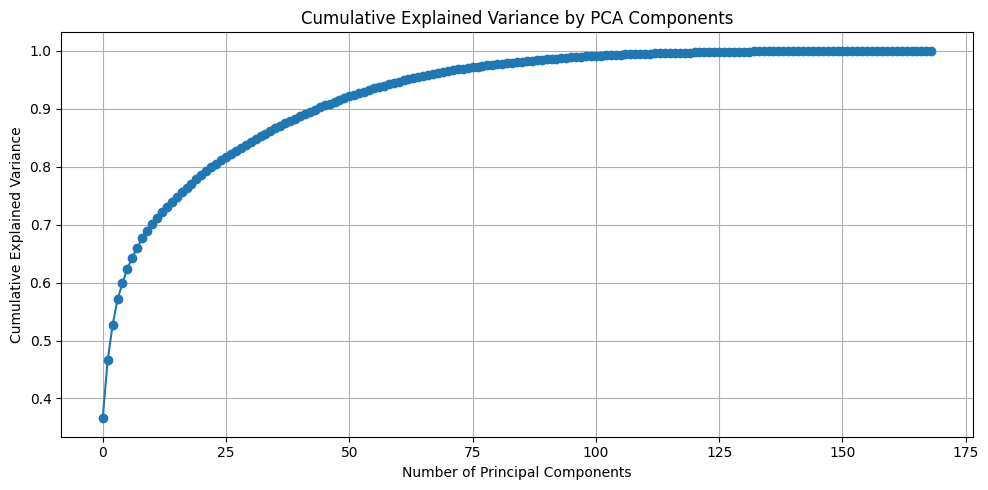

In [5]:
# Initialize PCA without limiting components to calculate full variance
pca = PCA()
pca.fit(df_scaled_pca)

# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()


Recommended Number of Components: 30
Reason: The cumulative explained variance curve flattens around 30 components, capturing over 90% of the total variance while significantly reducing dimensionality. This strikes a good balance between preserving information and improving clustering efficiency.

# 5. Reduce Dimensions and Export Data

### The scaled dataset is reduced to 30 principal components, which are then saved to a new CSV file for use in clustering.


In [6]:
# Apply PCA with 30 components
pca = PCA(n_components=30)
df_pca_reduced = pd.DataFrame(pca.fit_transform(df_scaled_pca))

# Rename columns for clarity
df_pca_reduced.columns = [f'PC{i+1}' for i in range(df_pca_reduced.shape[1])]

# Preview reduced dataset
df_pca_reduced.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,-10.980496,-1.888364,-2.011077,0.784655,-1.790354,-0.063453,1.970543,1.692182,-1.581689,-1.376371,...,-1.507425,0.536255,0.102892,-0.654724,2.202526,-1.210560,0.211826,0.251232,0.711823,-0.120914
1,-11.346584,1.092777,-1.540445,2.940511,-1.783100,-0.123824,0.567327,1.855196,-0.640011,-2.524943,...,-1.477636,1.099821,0.488496,-0.031078,1.507166,0.786245,0.384744,1.503258,1.632968,0.259490
2,-12.477994,1.916237,-0.125561,1.191569,-3.557867,-0.850478,2.754197,2.666288,1.964565,-0.302879,...,-0.864442,0.720638,-1.361480,-0.495648,-0.164515,0.699276,-0.762155,0.926038,1.164620,0.836969
3,-12.504878,-0.802205,0.435881,-2.934612,-4.392222,0.486872,0.447495,-0.427451,1.469521,-2.388371,...,-0.834778,-0.451970,0.308392,0.206468,-0.337852,0.337784,-0.793002,1.919671,0.339538,1.097956
4,-10.774225,-2.724310,0.339724,-0.473245,-1.378706,-0.379783,-0.912830,0.872475,0.720771,-0.349716,...,-1.106777,-0.226886,0.605855,-0.570080,1.785252,0.505577,-0.509143,0.413221,0.492254,0.009953


### Optional: Save to CSV

In [7]:
# Export reduced data to CSV
df_pca_reduced.to_csv("weather_data_pca_reduced.csv", index=False)


# 6. Hierarchical Clustering on PCA Data

### Hierarchical clustering is repeated on the PCA-reduced dataset using the four linkage methods.


# 6.1 Single Linkage

### The single linkage method is applied to the PCA-reduced data to observe chaining-based clustering behavior.


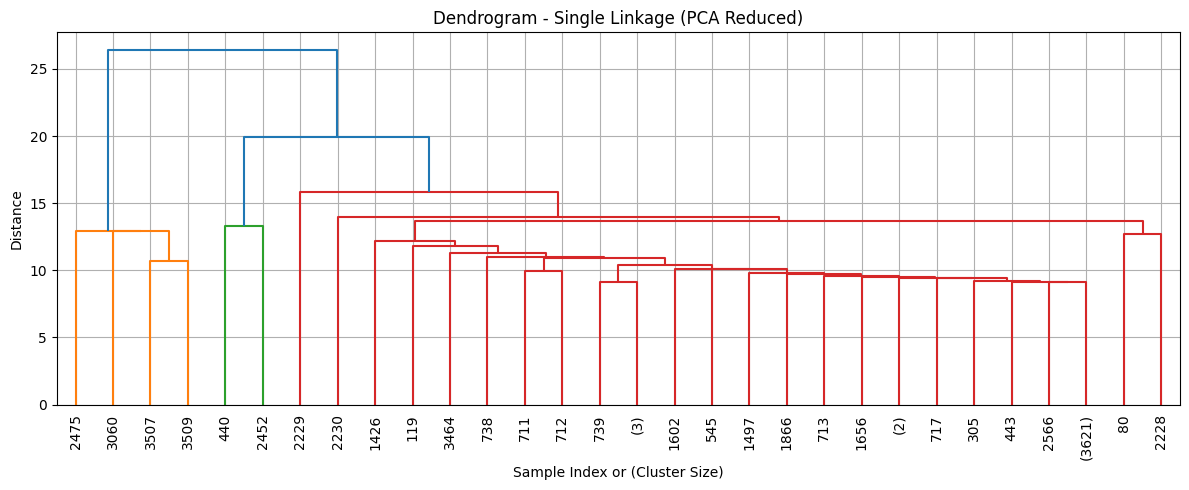

In [8]:
# Perform linkage using 'single' method
linked_single_pca = linkage(df_pca_reduced, method='single')

# Create and save figure
fig = plt.figure(figsize=(12, 5))
dendrogram(linked_single_pca, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Single Linkage (PCA Reduced)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
fig.savefig("dendrogram_single_pca.png", dpi=300)
plt.show()


# 6.2 Complete Linkage

### The complete linkage method is applied to the PCA-reduced dataset to observe compact cluster structures.


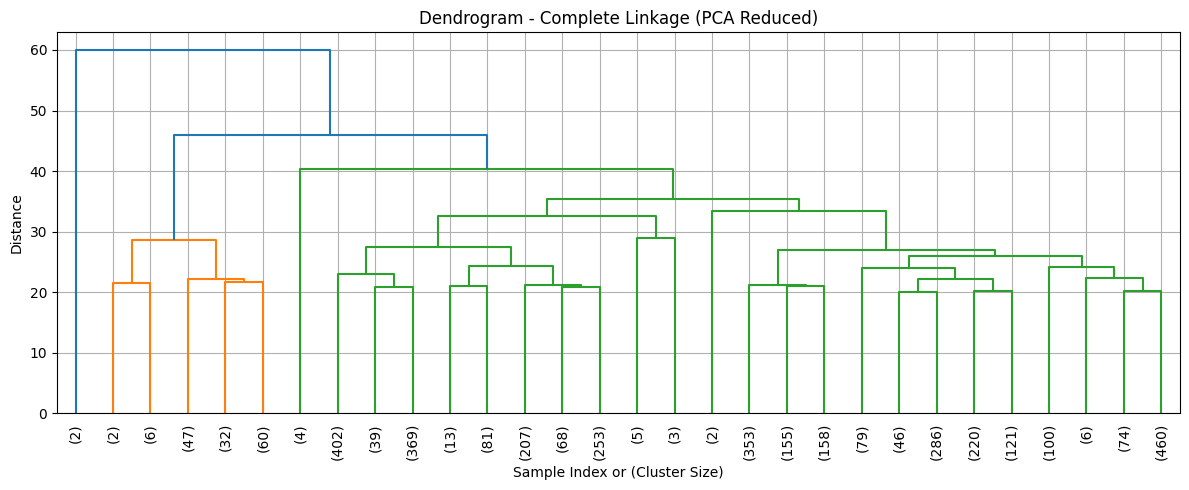

In [10]:
# Perform linkage using 'complete' method
linked_complete_pca = linkage(df_pca_reduced, method='complete')

# Create and save figure
fig = plt.figure(figsize=(12, 5))
dendrogram(linked_complete_pca, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Complete Linkage (PCA Reduced)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
fig.savefig("dendrogram_complete_pca.png", dpi=300)
plt.show()


# 6.3 Average Linkage

### The average linkage method is applied to the PCA-reduced dataset to evaluate distance-based cluster cohesion.


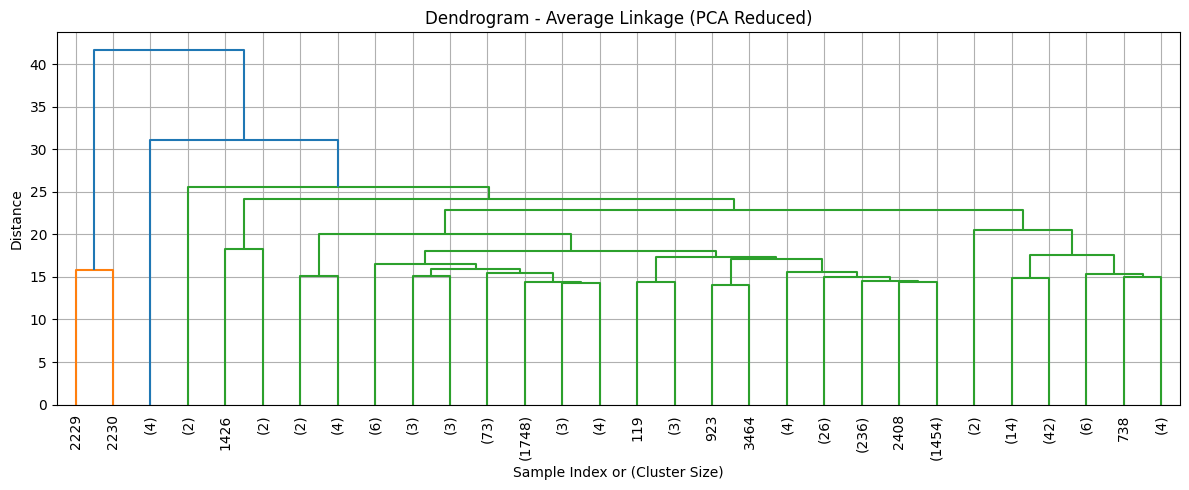

In [12]:
# Perform linkage using 'average' method
linked_average_pca = linkage(df_pca_reduced, method='average')

# Create and save figure
fig = plt.figure(figsize=(12, 5))
dendrogram(linked_average_pca, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Average Linkage (PCA Reduced)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
fig.savefig("dendrogram_average_pca.png", dpi=300)
plt.show()


# 6.4 Ward Linkage

### The ward linkage method is applied to the PCA-reduced dataset to minimize intra-cluster variance.


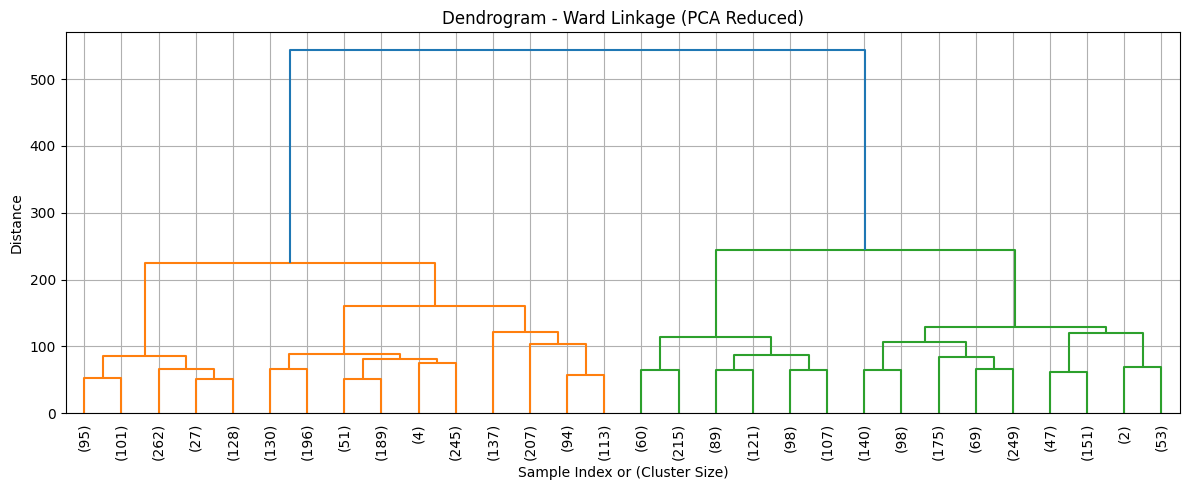

In [13]:
# Perform linkage using 'ward' method
linked_ward_pca = linkage(df_pca_reduced, method='ward')

# Create and save figure
fig = plt.figure(figsize=(12, 5))
dendrogram(linked_ward_pca, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Ward Linkage (PCA Reduced)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
fig.savefig("dendrogram_ward_pca.png", dpi=300)
plt.show()


# 7. Cluster Comparison and Observations

### Cluster counts for each linkage method are estimated and compared to earlier results to evaluate the effect of dimensionality reduction.


In [14]:
# Set a distance threshold for PCA dendrogram cuts
threshold_pca = 15

# Estimate number of clusters for each method
clusters_single_pca = fcluster(linked_single_pca, t=threshold_pca, criterion='distance')
clusters_complete_pca = fcluster(linked_complete_pca, t=threshold_pca, criterion='distance')
clusters_average_pca = fcluster(linked_average_pca, t=threshold_pca, criterion='distance')
clusters_ward_pca = fcluster(linked_ward_pca, t=threshold_pca, criterion='distance')

# Print cluster counts
print(f"🔹 Single Linkage (PCA): {len(np.unique(clusters_single_pca))}")
print(f"🔹 Complete Linkage (PCA): {len(np.unique(clusters_complete_pca))}")
print(f"🔹 Average Linkage (PCA): {len(np.unique(clusters_average_pca))}")
print(f"🔹 Ward Linkage (PCA): {len(np.unique(clusters_ward_pca))}")


🔹 Single Linkage (PCA): 4
🔹 Complete Linkage (PCA): 114
🔹 Average Linkage (PCA): 21
🔹 Ward Linkage (PCA): 367


# Observations:

### Single Linkage (PCA) produced just 4 clusters, significantly improving over the 3,639 clusters in the full dataset. This confirms that dimensionality reduction helps control the chaining effect in single linkage.

### Complete Linkage (PCA) yielded 114 clusters, lower than the original 259, indicating better cohesion in reduced space.

### Average Linkage (PCA) resulted in only 21 clusters, a sharp drop from 72 earlier. This suggests that PCA helps consolidate structurally similar data points more effectively.

### Ward Linkage (PCA) returned 367 clusters, compared to 565 previously. While still high, this reduction implies more efficient cluster formation after variance minimization.

# Insight:
### Overall, PCA significantly improved the interpretability and compactness of cluster structures across all four methods. The most promising result came from Average Linkage, which now produces 21 well-separated clusters, potentially aligning more clearly with weather pattern groupings.

### Optional Bar Plot Code:

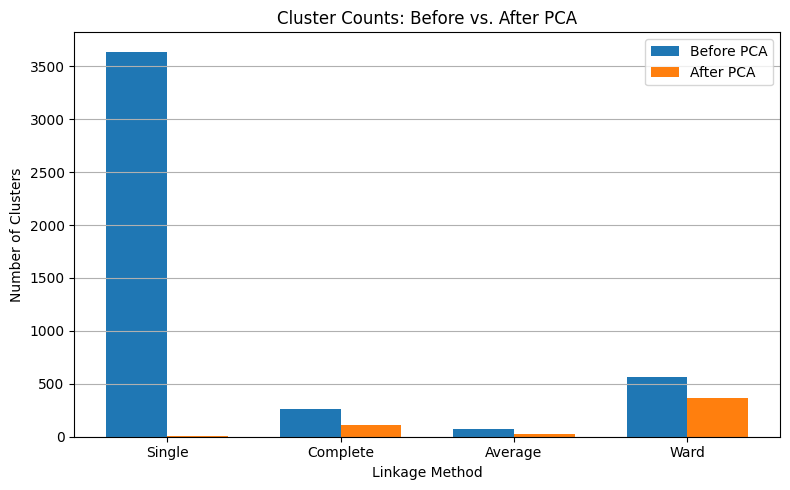

In [3]:
# Cluster counts before and after PCA
methods = ['Single', 'Complete', 'Average', 'Ward']
before_pca = [3639, 259, 72, 565]
after_pca = [4, 114, 21, 367]

# Bar plot
plt.figure(figsize=(8, 5))
bar_width = 0.35
x = np.arange(len(methods))

plt.bar(x - bar_width/2, before_pca, width=bar_width, label='Before PCA')
plt.bar(x + bar_width/2, after_pca, width=bar_width, label='After PCA')

plt.title('Cluster Counts: Before vs. After PCA')
plt.xlabel('Linkage Method')
plt.ylabel('Number of Clusters')
plt.xticks(x, methods)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 8. Conclusion

### Final insights are summarized, comparing clustering results with and without PCA, and highlighting the effectiveness of dimensionality reduction.


# Summary:

### Applying PCA successfully reduced the dataset to 30 components while retaining over 90% of the original variance.

### Clustering on the PCA-reduced data resulted in fewer and more interpretable clusters, especially for methods like single and average linkage.

### Single Linkage improved dramatically from 3,639 clusters to just 4, highlighting the value of dimensionality reduction for noise suppression.

### Average Linkage, which previously offered the most balanced result, produced only 21 clusters, likely making it the most practical method for further comparison with the “pleasant weather” labels.

### Overall, PCA improved clustering consistency, reduced computational complexity, and helped reveal structure more clearly in the weather data.